<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/Correlation/GEO-Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geoponiki

In [1]:
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyparsing.helpers import PrecededBy
url='https://raw.githubusercontent.com/costpetrides/Air-pollution-COVID-19-impact/main/Lockdown%201/DATA/GeoponikiLock.csv'
df = pd.read_csv(url)
print(df)

       DAY  COMEAN  COMIN  COMAX  CO20  C021  O3MEAN  O3MIN  O3MAX  O320  ...  \
0    1-Mar     0.9    0.5    1.5   0.7   0.4      43     30     53    43  ...   
1    2-Mar     0.6    0.4    0.8   0.8   0.2      60     47     72    41  ...   
2    3-Mar     0.6    0.5    0.6   0.7   0.3      51     31     79    58  ...   
3    4-Mar     0.6    0.4    0.8   0.4   0.6      47     38     59    66  ...   
4    5-Mar     0.7    0.4    1.1   0.8   0.8      49     38     57    35  ...   
..     ...     ...    ...    ...   ...   ...     ...    ...    ...   ...  ...   
87  27-May     0.3    0.2    0.4   0.4   0.3      67     37     85    59  ...   
88  28-May     0.3    0.2    0.4   0.8   0.0      67     56     79    44  ...   
89  29-May     0.3    0.2    0.4   0.7   0.0      70     65     79    39  ...   
90  30-May     0.4    0.3    0.4   0.6   0.0      61     58     63    61  ...   
91  31-May     0.4    0.4    0.5   0.6   0.0      51     46     57    81  ...   

    NOMEAN  NOMIN  NOMAX  N

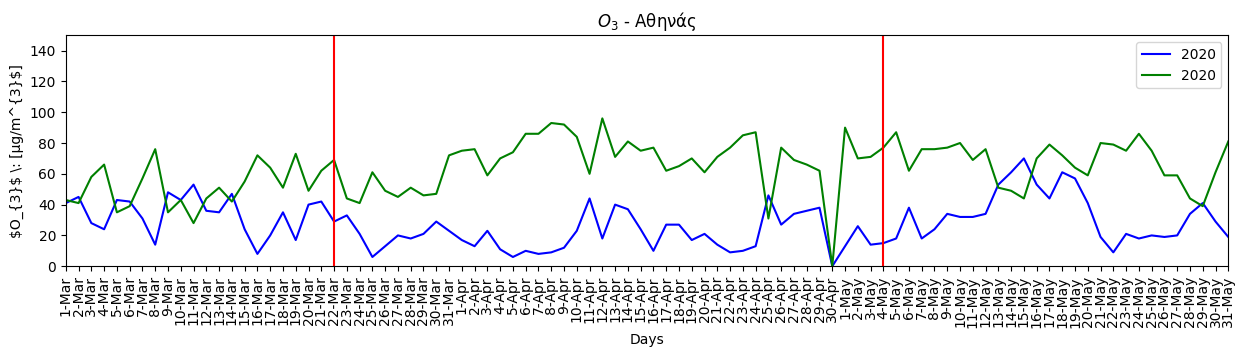

In [3]:
plt.figure(figsize=(15,3))
plt.title("$O_{3}$ - Γεωπονική")

plt.xlabel('Days')
plt.ylabel('$O_{3}$ \: [μg/m^{3}$]')

plt.title("$O_{3}$ - Aθηνάς")

plt.plot(df['DAY'], df['NO220'], 'b', label='2020')
plt.plot(df['DAY'], df['O320'], 'g', label='2020')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,150)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

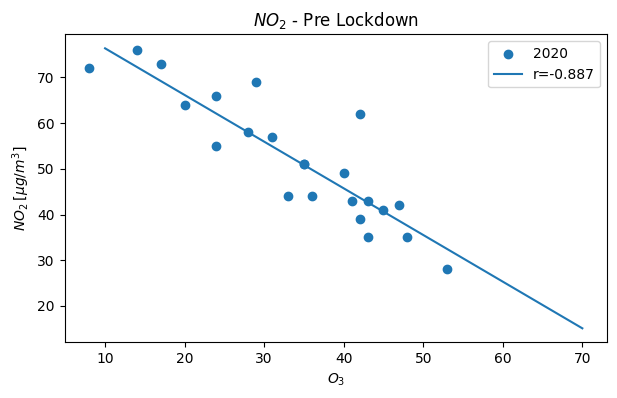

In [4]:
r=scipy.stats.pearsonr(df['NO220'][0:23],df['O320'][0:23])[0]

plt.figure(figsize=(7,4))
plt.xlabel('$O_{3}$')
plt.ylabel('$NO_{2} \: [μg/m^{3}$]')

plt.title("$NO_{2}$ - Pre Lockdown")

x=[]
for i in df['NO220'][0:23]:
  if i==0:
    continue
  else:
    x+=[i]

y=[]
for i in df['O320'][0:23]:
  if i==0:
    continue
  else:
    y+=[i]

plt.scatter(x, y, label='2020')
plt.legend()

m, b = np.polyfit(df['NO220'][0:23], df['O320'][0:23], 1)

xx=np.linspace(10,70,6000)
plt.plot(xx, m*xx + b, label='r=%.3f' %(r))
plt.legend()

plt.show()

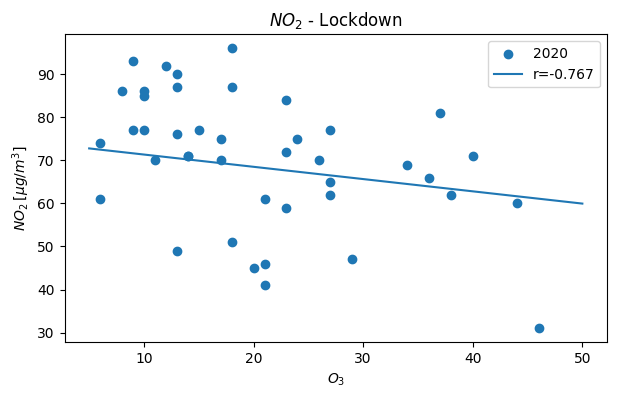

In [6]:
r=scipy.stats.pearsonr(df['NO220'][23:66],df['O320'][23:66])[0]

plt.figure(figsize=(7,4))
plt.xlabel('$O_{3}$')
plt.ylabel('$NO_{2} \: [μg/m^{3}$]')

plt.title("$NO_{2}$ - Lockdown")

x=[]
for i in df['NO220'][23:66]:
  if i==0:
    continue
  else:
    x+=[i]

y=[]
for i in df['O320'][23:66]:
  if i==0:
    continue
  else:
    y+=[i]

r=scipy.stats.pearsonr(x[23:66],y[23:66])[0]


plt.scatter(x, y, label='2020')
plt.legend()

m, b = np.polyfit(df['NO220'][23:66], df['O320'][23:66], 1)

xx=np.linspace(5,50,500)
plt.plot(xx, m*xx + b, label='r=%.3f' %(r))
plt.legend()

plt.show()

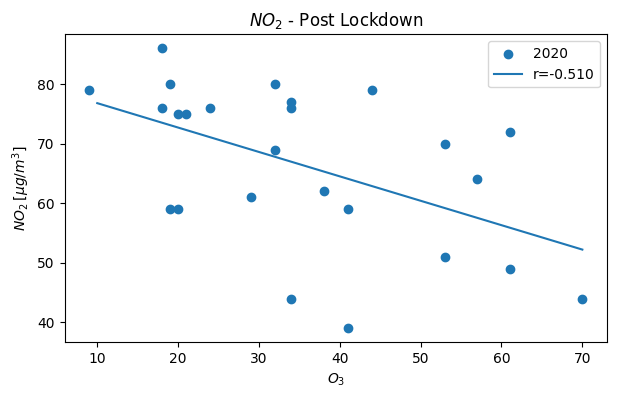

In [7]:
r=scipy.stats.pearsonr(df['NO220'][66:91],df['O320'][66:91])[0]

plt.figure(figsize=(7,4))
plt.xlabel('$O_{3}$')
plt.ylabel('$NO_{2} \: [μg/m^{3}$]')

plt.title("$NO_{2}$ - Post Lockdown")

x=[]
for i in df['NO220'][66:91]:
  if i==0:
    x+=[None]
  else:
    x+=[i]

y=[]
for i in df['O320'][66:91]:
  if i==0:
    y+=[None]
  else:
    y+=[i]

plt.scatter(x, y, label='2020')
plt.legend()

m, b = np.polyfit(df['NO220'][66:91], df['O320'][66:91], 1)

xx=np.linspace(10,70,6000)
plt.plot(xx, m*xx + b, label='r=%.3f' %(r))
plt.legend()

plt.show()